In [15]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import pandas as pd
import os
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
path = '/content/drive/MyDrive/chest_xray/'
# define paths
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/chest_xray/train/'
val_path = '/content/drive/MyDrive/chest_xray/val/'
test_path = '/content/drive/MyDrive/chest_xray/test/'

In [18]:
os.listdir(path)

['val', 'test', 'train']

In [19]:
csv_path = ('/content/drive/MyDrive/pneumonia_symptoms.csv')
patient_data = pd.read_csv(csv_path)
print(patient_data)

    Cough  Fever  Shortness of breath  Chest pain            Status
0       0      0                    0           1            Normal
1       0      1                    0           1            Normal
2       0      1                    1           1  Mostly Pneumonia
3       1      1                    1           0         Uncertain
4       0      1                    0           1  Mostly Pneumonia
5       0      1                    1           1         Uncertain
6       0      1                    0           1            Normal
7       1      0                    0           1  Mostly Pneumonia
8       0      0                    0           1  Mostly Pneumonia
9       0      0                    1           1            Normal
10      0      1                    0           1         Uncertain
11      1      1                    0           0         Pneumonia
12      1      1                    1           0         Uncertain
13      0      0                    0           

In [20]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
    folders = glob('/content/drive/MyDrive/chest_xray/train/*')
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)
#width_shift_range=0.2,
# height_shift_range=0.2,
# vertical_flip=True, )                             # rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 180)
   # width_shift_range=0.2,  # Randomly shift images horizontally (fraction of total width)
  #  height_shift_range=0.2,  # Randomly shift images vertically (fraction of total height)
 #   brightness_range=[0.8, 1.2],  # Randomly adjust brightness

 #   vertical_flip=True,  # Randomly flip images vertically
 #   fill_mode='nearest' ) # Fill in newly created pixels after rotation or shift)


test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [28]:
from keras.callbacks import EarlyStopping
#from keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_lo\A  Z\ss', save_best_only=True)
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set), callbacks=[early_stopping]
)

Epoch 1/30
164/164 [==============================] - 147s 891ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.4576 - val_accuracy: 0.9215
Epoch 2/30
164/164 [==============================] - 134s 818ms/step - loss: 0.0560 - accuracy: 0.9811 - val_loss: 0.5795 - val_accuracy: 0.8974
Epoch 3/30
164/164 [==============================] - 135s 821ms/step - loss: 0.0546 - accuracy: 0.9828 - val_loss: 0.3931 - val_accuracy: 0.9215
Epoch 4/30
164/164 [==============================] - 133s 807ms/step - loss: 0.0599 - accuracy: 0.9815 - val_loss: 0.4057 - val_accuracy: 0.9199
Epoch 5/30
164/164 [==============================] - 135s 819ms/step - loss: 0.0668 - accuracy: 0.9780 - val_loss: 0.6641 - val_accuracy: 0.8894
Epoch 6/30
164/164 [==============================] - 133s 811ms/step - loss: 0.0619 - accuracy: 0.9805 - val_loss: 0.4376 - val_accuracy: 0.9151
Epoch 7/30
164/164 [==============================] - 137s 831ms/step - loss: 0.0552 - accuracy: 0.9824 - val_loss: 0.5565 -

Text(0, 0.5, 'Loss')

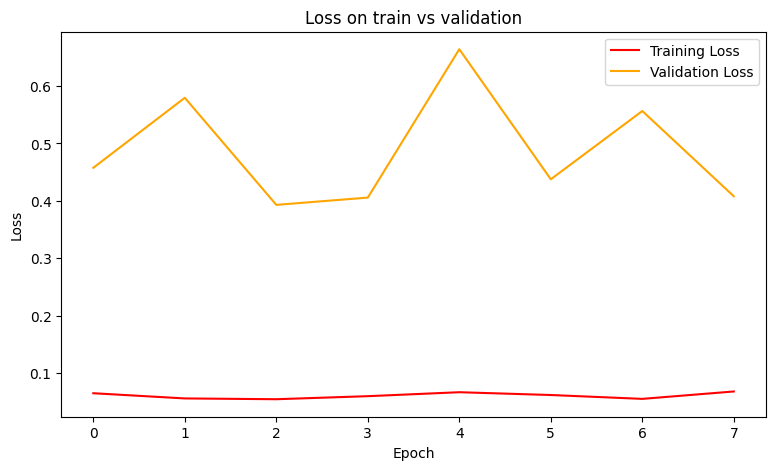

In [33]:
plt.figure(figsize=(20,5))

# plot loss & val loss
plt.subplot(1,2,1)
sns.lineplot(x=r.epoch, y=r.history['loss'], color='red', label='Training Loss')
sns.lineplot(x=r.epoch, y=r.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss on train vs validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Loss')

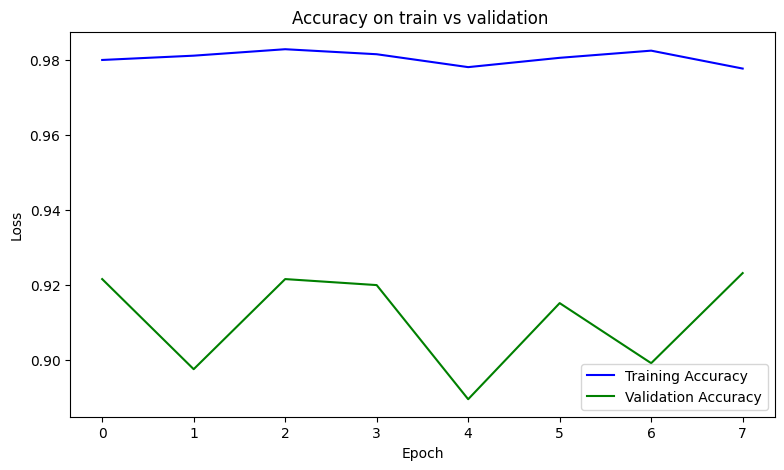

In [32]:
# plot accuracy and val accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=r.epoch, y=r.history['accuracy'], color='blue', label='Training Accuracy')
sns.lineplot(x=r.epoch, y=r.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Accuracy on train vs validation ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

#plt.show()

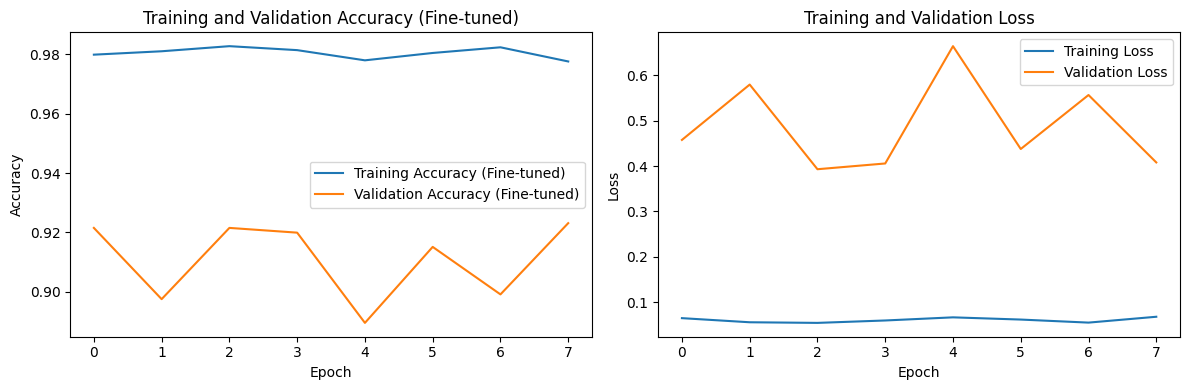

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='Training Accuracy (Fine-tuned)')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy (Fine-tuned)')
plt.title('Training and Validation Accuracy (Fine-tuned)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
model.save('/content/drive/MyDrive/chest_xray/newmodelsave.h5')

In [41]:
# Prediction
y_pred = model.predict(test_set)
# Predicting labels for the test set
y_pred_classes = np.argmax(y_pred, axis=1)


20/20 [==============================] - 7s 342ms/step


20/20 [==============================] - 7s 354ms/step


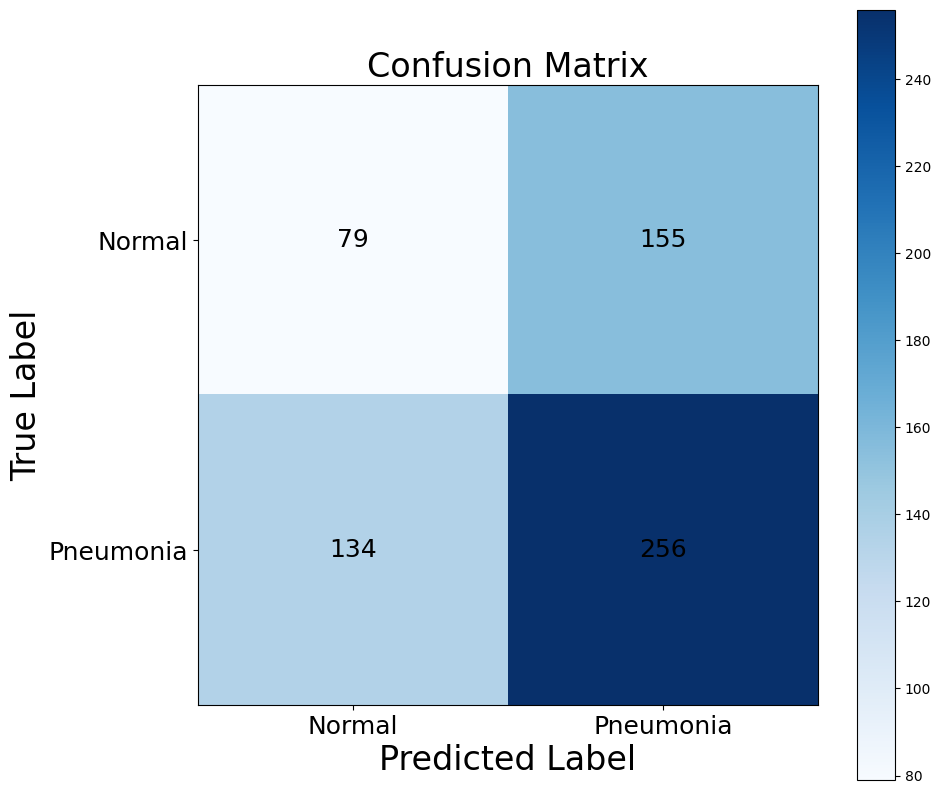

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the true labels and predicted labels
true_labels = test_set.classes
predicted_labels = np.argmax(model.predict(test_set), axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define the labels for the axes
labels = ['Normal', 'Pneumonia']

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=24)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, fontsize=18)
plt.yticks(tick_marks, labels, fontsize=18)

# Fill in the cells with the numbers
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', fontsize=18)

plt.xlabel('Predicted Label', fontsize=24)
plt.ylabel('True Label', fontsize=24)
plt.show()


In [43]:
from sklearn.metrics import classification_report

# Get the true labels and predicted labels
true_labels = test_set.classes
predicted_labels = np.argmax(model.predict(test_set), axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)

20/20 [==============================] - 8s 405ms/step
              precision    recall  f1-score   support

           0       0.35      0.32      0.34       234
           1       0.61      0.65      0.63       390

    accuracy                           0.52       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.52      0.52      0.52       624



In [44]:
from tensorflow.keras.models import load_model
from PIL import Image

# Load the saved model

model_path = '/content/drive/MyDrive/chest_xray/newmodelsave.h5'
# Load the saved model
loaded_model = load_model(model_path)

# Define class labels
class_labels = ["NORMAL", "PNEUMONIA"]

# Function to preprocess the input image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img/255.0
    return img


# Function to make predictions
def predict_image(model, image_path):
    preprocessed_img = preprocess_image(image_path)
    preprocessed_img = np.expand_dims(preprocessed_img, axis=0)
    prediction = model.predict(preprocessed_img)
    return prediction

# Function to get predicted class and probability
def get_predicted_class(prediction):
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_class_index]
    probability = prediction[0][predicted_class_index]
    predicted_class_probability = prediction[0][predicted_class_index]
    negative_class_index = 1 - predicted_class_index
    negative_class_probability = prediction[0][negative_class_index]

    # Display probabilities
    print("Positive Probability (Predicted Class):{:.2f}%".format( predicted_class_probability*100))
    print("Negative Probability (Opposite Class):{:.2f}%" .format(negative_class_probability*100))

    return predicted_class, probability

In [45]:
import cv2
# Reshape input data before prediction
image_path = '/content/drive/MyDrive/chest_xray_equal/test/NORMAL/IM-0006-0001.jpeg'
# Predict image
prediction = predict_image(loaded_model, image_path)
predicted_class, probability = get_predicted_class(prediction)
print("Predicted Class:", predicted_class)
print("Probability: {:.2f}%".format(probability*100))

1/1 [==============================] - 1s 1s/step
Positive Probability (Predicted Class):100.00%
Negative Probability (Opposite Class):0.00%
Predicted Class: NORMAL
Probability: 100.00%


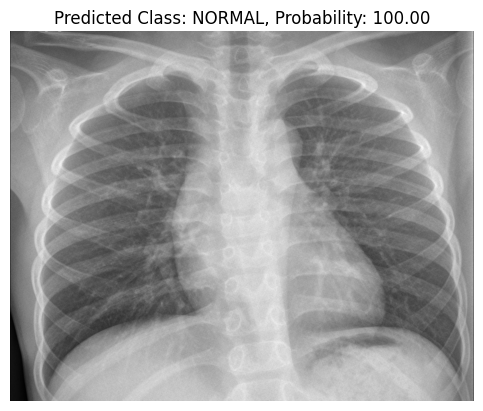

In [46]:
plt.imshow(cv2.imread(image_path))
probability_formatted = "{:.2f}".format(probability * 100)
plt.title(f'Predicted Class: {predicted_class}, Probability: {probability_formatted}')
plt.axis('off')
plt.show()

In [47]:
import cv2
# Reshape input data before prediction
image_path = '/content/drive/MyDrive/chest_xray_equal/test/PNEUMONIA/person99_bacteria_474.jpeg'
# Predict image
prediction = predict_image(loaded_model, image_path)
predicted_class, probability = get_predicted_class(prediction)
print("Predicted Class:", predicted_class)
print("Probability: {:.2f}%".format(probability*100))

1/1 [==============================] - 0s 28ms/step
Positive Probability (Predicted Class):99.94%
Negative Probability (Opposite Class):0.06%
Predicted Class: PNEUMONIA
Probability: 99.94%


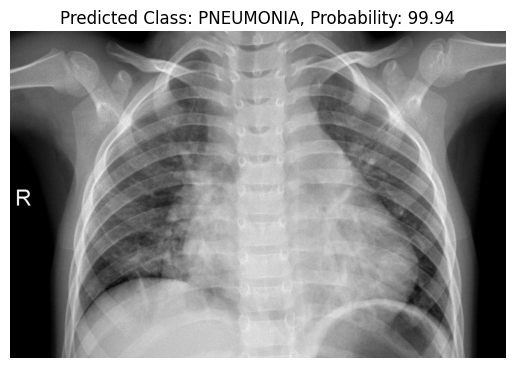

In [48]:
plt.imshow(cv2.imread(image_path))
probability_formatted = "{:.2f}".format(probability * 100)
plt.title(f'Predicted Class: {predicted_class}, Probability: {probability_formatted}')
plt.axis('off')
plt.show()

In [49]:
import cv2
# Reshape input data before prediction
image_path = '/content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'
# Predict image
prediction = predict_image(loaded_model, image_path)
predicted_class, probability = get_predicted_class(prediction)
print("Predicted Class:", predicted_class)
print("Probability: {:.2f}%".format(probability*100))


1/1 [==============================] - 0s 39ms/step
Positive Probability (Predicted Class):99.79%
Negative Probability (Opposite Class):0.21%
Predicted Class: NORMAL
Probability: 99.79%


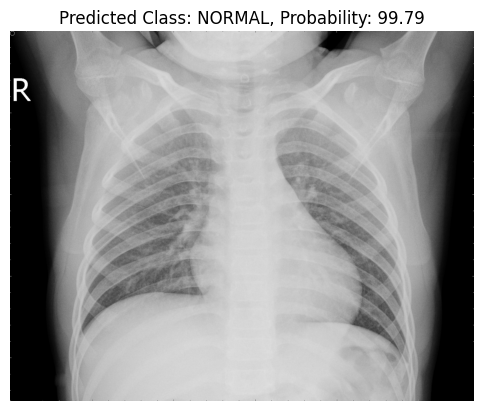

In [50]:
plt.imshow(cv2.imread(image_path))
probability_formatted = "{:.2f}".format(probability * 100)
plt.title(f'Predicted Class: {predicted_class}, Probability: {probability_formatted}')
plt.axis('off')
plt.show()